# Test notebook for some standard environments.


This notebook contains demonstrations of 

(2011 Nguyen)
https://ewrl.files.wordpress.com/2011/08/ewrl2011_submission_110.pdf

* 4x4 Maze

(2012 Daswani)
http://proceedings.mlr.press/v24/daswani12a/daswani12a.pdf

* [todo] Deterministic TMaze 

* [todo] Stochastic TMaze

* [todo] Tiger

In [36]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from env.environments import Grid4x4
from agents.agent import RandomAgent
from agents.sarsa import Sarsa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
def show_moves(agent, env):
    """ Shows some examples moves between agent and enviroment. """
    
    print("Playing game with agent {} in environment {}".format(agent, env)) 
    obs, reward = env.reset(), 0    
    for i in range(10):
        action = agent.act(obs,reward)
        print("Saw observation {} with reward {} and played action {}".format(obs, reward, action))
        obs, reward, done, info = env.step(action)
        env.render()
        if done:
            break        
            
def evaluate_agent(agent, env, max_steps = 1000):
    """ Evaluates the agents performance on the environment. """
        
    obs, reward = env.reset(), 0    
    total_reward = 0
    reward_history = []
    
    for i in range(max_steps):
        action = agent.act(obs,reward)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        reward_history.append(total_reward)
        if done:
            break 
        
    return reward_history
        
def plot_reward_history(agent, env):
    
    steps = 1000
    trials = 100
    
    total_reward = np.zeros(steps)

    for i in range(trials):
        total_reward += np.array(np.array(evaluate_agent(agent, env, steps))) / trials

    plt.plot(range(steps), total_reward, label=agent)        
    plt.xlabel("Step")
    plt.ylabel("Average Reward")    
    plt.legend()
    plt.show()

# 1. Grid 4x4

The domain is a 4×4 grid world. At each time step, the agent can move one cell left, right, up and down within the grid world. The observations are uninformative. When the agent enters the bottom-right corner of the grid; it gets a reward of 1, and is automatically and randomly sent back to one of the remaining 15 cells. Entering any cell other than the bottom-right one gives the agent a zero reward. To achieve the maximal total reward, the agent must be able to remember a series of smart actions without any clue about its relative position in the grid.         

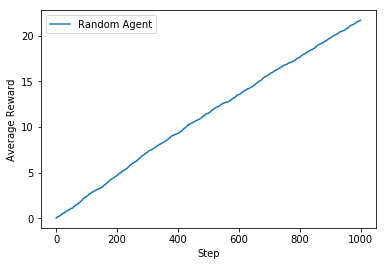

In [40]:
env = Grid4x4()
agent = RandomAgent(env.action_space)
plot_reward_history(agent,env)

This task requires memory.  Interestingly an algorithm like SARSA will not work as the assume a Markovian state, which is not true in this case.  We must remember our past actions in order to find the optimal policy, which is simply an alternating pattern of 'down' and 'left'.

A stochastic policy that learns the value of the actions 'down' and 'left' will also perform well, but not as optimally as the repeating pattern.